In [149]:
using CSV, Dates, DataFrames, Plots, Statistics, Interact

baseurl = "http://klapp.met.no/metnopub/production/metno"
s = [700,18700]
p = ["TA","PO"]; 

pstr = join(p,"&p=") 
sstr = join(s,"&s=")
fd = "01.01.2017"
td = "01.01.2018"


param = "?re=17&p=$pstr&fd=$fd&td=$td&nmt=0&ddel=dot&del=semicolon&ct=text/plain&s=$sstr&nod=line"
 
g = download(baseurl*param)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  486k    0  486k    0     0  43773      0 --:--:--  0:00:11 --:--:-- 73177


"/tmp/juliaFpgyPf"

In [150]:
df = CSV.read(g,types=[Int64, Int64, Int64,Int64,Int64,Float64,Float64])


,Stnr,Year,Month,Day,Time(UTC),TA,PO
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,700,2017,1,1,0,-8.1,921.1
2,700,2017,1,1,1,-8.9,921.2
3,700,2017,1,1,2,-10.0,920.8
4,700,2017,1,1,3,-9.3,920.7
5,700,2017,1,1,4,-7.3,920.3
6,700,2017,1,1,5,-6.7,920.3
7,700,2017,1,1,6,-2.9,920.4
8,700,2017,1,1,7,-1.5,921.1
9,700,2017,1,1,8,-1.4,921.5


In [93]:
df[:DateTime] = DateTime.(df[:Year],df[:Month],df[:Day],df[Symbol("Time(UTC)")])

groupedbyStnr = groupby(df,:Stnr)
dtrange=1:240
POdiff = Dict()
TAdiff = Dict()
for station in groupedbyStnr
    POdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:PO]).^2) for start in 1:1:step]) for step in dtrange]
    TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
end


In [152]:

groupedbyStnr = groupby(df,:Stnr)
makegauss(r,s) = dt -> s*(1-exp(-3*dt^2/r^2))
makeexpo(r,s)  = dt -> s*(1-exp(-3*dt/r))
# my =  (250*[(1-exp(-3*dt^2/70^2 - dt/70)) for dt in dtrange])
# 
dtrange=1:3:240
vars = OrderedDict(zip(["PO", "TA"], [POdiff, TAdiff]))
vars = [:PO,:TA]
mp = @manipulate for  var in vars,  #stations in  dropdown(s , multiple=true,label="Stnr"),
                  s in  slider(0:10:600,label="Sill"),
                  r in slider(0:10:600, label="Range")
    p1 = plot()
    # p2 = plot()
    for station in groupedbyStnr
        JFM = filter(r -> r[:Month] in [1,2,3], station)
        JFMdiff =  [mean([mean(diff(JFM[start:step:end,var]).^2) for start in 1:1:step]) for step in dtrange]
             #  TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
        plot!(p1,dtrange,JFMdiff,label="JFM  $(station[:Stnr][1])",markershape=:circle)
        AMJ  = filter(r -> r[:Month] in [4,5,6], station)
        AMJdiff =  [mean([mean(diff(AMJ[start:step:end,var]).^2) for start in 1:1:step]) for step in dtrange]
             #  TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
        plot!(p1,dtrange,AMJdiff,label="AMF  $(station[:Stnr][1])",markershape=:square)
        JAS  = filter(r -> r[:Month] in [7,8,9], station)
        JASdiff =  [mean([mean(diff(JAS[start:step:end,var]).^2) for start in 1:1:step]) for step in dtrange]
             #  TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
        plot!(p1,dtrange,JASdiff,label="JAS  $(station[:Stnr][1])",markershape=:utriangle)
        OND = filter(r -> r[:Month] in [7,8,9], station)
        ONDdiff =  [mean([mean(diff(OND[start:step:end,var]).^2) for start in 1:1:step]) for step in dtrange]
             #  TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
        plot!(p1,dtrange,ONDdiff,label="OND  $(station[:Stnr][1])",markershape=:dtriangle)
        
    end
    #for v in var
    #    plot!(dtrange,v[2],label=v[1],markershape=:circle)
    #end
    
    #for station in groupedbyStnr
    #    POdiff =  [mean([mean(diff(station[start:step:end,var]).^2) for start in 1:1:step]) for step in dtrange]
    #   plot!(dtrange,POdiff,label=string(station[:Stnr][1]),markershape=:circle)
    #end
    gauss = makegauss(r,s) 
    expo = makeexpo(r,s)

    plot!(gauss,dtrange,linewidth=2,label="gauss")
    #plot!(expo,dtrange,linewidth=2,label="expo")
    #plot!(legend=:topleft)
    #plot!(title="variogram, sill=$s, range=$r, nugget=0")
    #plot!(xlabel="dt (hours)")
    # plot!(p1,p2,layout=2)
   #plot!(dtrange,my,linewidth=2,label="my")
end
mp

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-2891773f-efba-4db2-92e2-c038b97d8d6e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["var"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")), 0)], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")), 1)], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"), 2)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 3), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 9), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"PO","val"=>1,"id"=>"idw7goa4uw"), OrderedDict{String,Any}("key"=>"TA","val"=>2,"id"=>"idLDACCeJR")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/roels/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/roels/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/roels/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/roels/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/roels/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"knockout-component-2891773f-efba-4db2-92e2-c038b97d8d6e\",\"id\":\"ob_1222\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-2891773f-efba-4db2-92e2-c038b97d8d6e\",\"id\":\"ob_1221\",\"type\":\"observable\"})};\n    var self = t

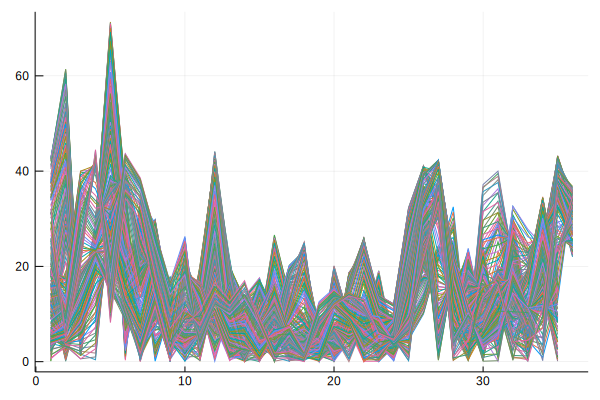

In [181]:
station = groupedbyStnr[2]
lag = 10*24
val = [sqrt.(diff(station[start:lag:end,:PO]).^2) for start in 1:lag]
plot(val,legend=false)

In [178]:
station

,Stnr,Year,Month,Day,Time(UTC),TA,PO
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,18700,2017,1,1,0,-0.2,991.5
2,18700,2017,1,1,1,-1.2,991.4
3,18700,2017,1,1,2,-1.3,991.2
4,18700,2017,1,1,3,3.6,991.3
5,18700,2017,1,1,4,1.5,991.2
6,18700,2017,1,1,5,0.4,991.7
7,18700,2017,1,1,6,-0.9,991.9
8,18700,2017,1,1,7,-1.0,992.3
9,18700,2017,1,1,8,-2.0,992.7
